## Basketball Analytics- Israeli Basketball Super League

**Introduction:**

"Basketball Analytics" is a database that covers the 2023-2024 season of the Israeli Basketball Super League.

It has detailed stats for teams and players, plus advanced metrics.

This project helps coaches, analysts, and scouts get better insights to improve performance and understand the data better.

It uses different tools to answer important questions about overall performance, split into two parts:
- Team Performance Analysis
- Player Performance Analysis





In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
ba1=pd.read_excel('VIEWS.xlsx','Avg_Team_Offensive_Points')
ba2=pd.read_excel('VIEWS.xlsx','Avg_Team_Three_Point')
ba3=pd.read_excel('VIEWS.xlsx','Avg_Team_Rebounds')
ba4=pd.read_excel('VIEWS.xlsx','Team_Stats_Comparison')
ba5=pd.read_excel('VIEWS.xlsx','Avg_Player_Points')
ba6=pd.read_excel('VIEWS.xlsx','Player_Shooting_Performance')
ba7=pd.read_excel('VIEWS.xlsx','Per_36')
ba8=pd.read_excel('VIEWS.xlsx','Avg_Points_Vs_Avg_Minutes')
ba9=pd.read_excel('VIEWS.xlsx','Asists_To_Turnovers_Ratio')
ba10=pd.read_excel('VIEWS.xlsx','Player_Tenure_Performance')
ba11=pd.read_excel('VIEWS.xlsx','Position_Performance')


In [3]:
sb.set_theme()

## Team Performance Analysis

***What are the average offensive points scored by each team during the season?***

In [4]:
# Show missing values per column
ba1.isnull().sum()

FullTeamName    0
Avg_Points      0
dtype: int64

In [5]:
ba1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullTeamName  13 non-null     object 
 1   Avg_Points    13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [6]:
ba1.describe()

,Avg_Points
count,13.000000
mean,83.333077
std,4.677455
min,75.910000
25%,81.450000
50%,82.270000
75%,82.680000
max,93.950000


In [7]:
# sort the values
ba1 = ba1.sort_values(by='Avg_Points', ascending=True, ignore_index=True)

In [8]:
ba1

,FullTeamName,Avg_Points
0,Hapoel-Eilat,75.91
1,Hapoel-Galil Elyon,80.95
2,Hapoel-Jerusalem,81.00
3,Bnei-Herzliya,81.45
4,Hapoel-Afula,81.48
5,Hapoel-Beer Sheva/Dimona,82.14
6,Hapoel-Holon,82.27
7,Hapoel-Haifa,82.57
8,Ironi-Nes Ziona,82.57
9,Elitzur-Kiryat Ata,82.68


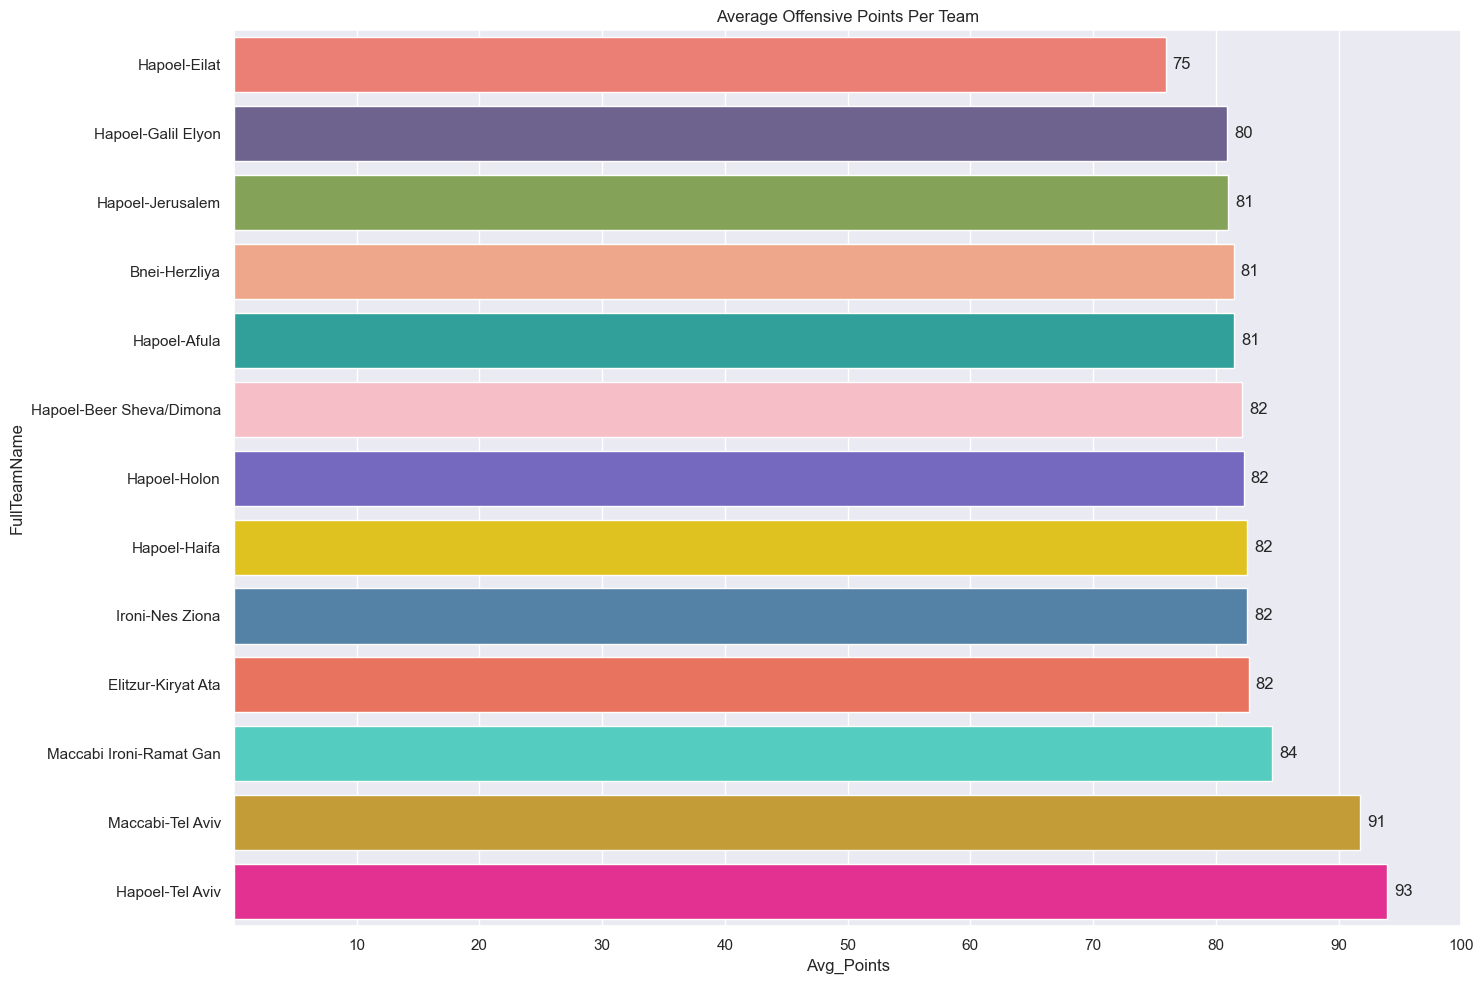

In [9]:
# Create and set up the figure size and DPI 
plt.figure(figsize=(15, 10), dpi=100)

# Define the colors 
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA07A", "#20B2AA", "#FFB6C1", "#6A5ACD", "#FFD700", "#4682B4",
          "#FF6347", "#40E0D0", "#DAA520", "#FF1493"]

# Create a horizontal bar plot
bar = sb.barplot(data=ba1, y='FullTeamName', x='Avg_Points', palette=colors, hue='FullTeamName')

# Add a title to the plot
plt.title('Average Offensive Points Per Team')

# Add the numbers on top of the bars
for num in bar.patches:
    value = int(num.get_width())  # Width for horizontal bars
    bar.annotate(f'{value:,}', (num.get_width(), num.get_y() + num.get_height() / 2.),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Set specific tick positions for the x-axis
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Adjust the layout of the plot
plt.tight_layout()

# show the plot
plt.show()



Summary:

- Highest-Scoring Team: Hapoel Tel Aviv leads with an average of 93 points per game.
- Least Offensive Team: Hapoel Eilat with an average of 75 points per game, 18 points behind.


***How does the three-point shooting performance compare among different teams?***

In [10]:
# Show missing values per column
ba2.isnull().sum()

FullTeamName    0
Avg_3PA         0
Avg_3PM         0
3P%             0
dtype: int64

In [11]:
ba2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullTeamName  13 non-null     object 
 1   Avg_3PA       13 non-null     float64
 2   Avg_3PM       13 non-null     float64
 3   3P%           13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


In [12]:
ba2.describe()

,Avg_3PA,Avg_3PM,3P%
count,13.000000,13.000000,13.000000
mean,25.695385,8.916923,34.723077
std,2.471638,1.063707,2.453281
min,20.680000,7.090000,29.400000
25%,24.130000,8.090000,33.300000
50%,25.550000,9.270000,34.800000
75%,27.910000,9.860000,36.300000
max,28.770000,10.270000,38.900000


In [13]:
ba2.nlargest(4,'3P%')

,FullTeamName,Avg_3PA,Avg_3PM,3P%
9,Hapoel-Tel Aviv,20.68,8.05,38.9
7,Hapoel-Holon,26.50,9.77,36.9
3,Hapoel-Beer Sheva/Dimona,25.36,9.27,36.6
6,Hapoel-Haifa,27.91,10.13,36.3


In [14]:
# sort the values
ba2 = ba2.sort_values(by='Avg_3PM', ascending=True, ignore_index=True)

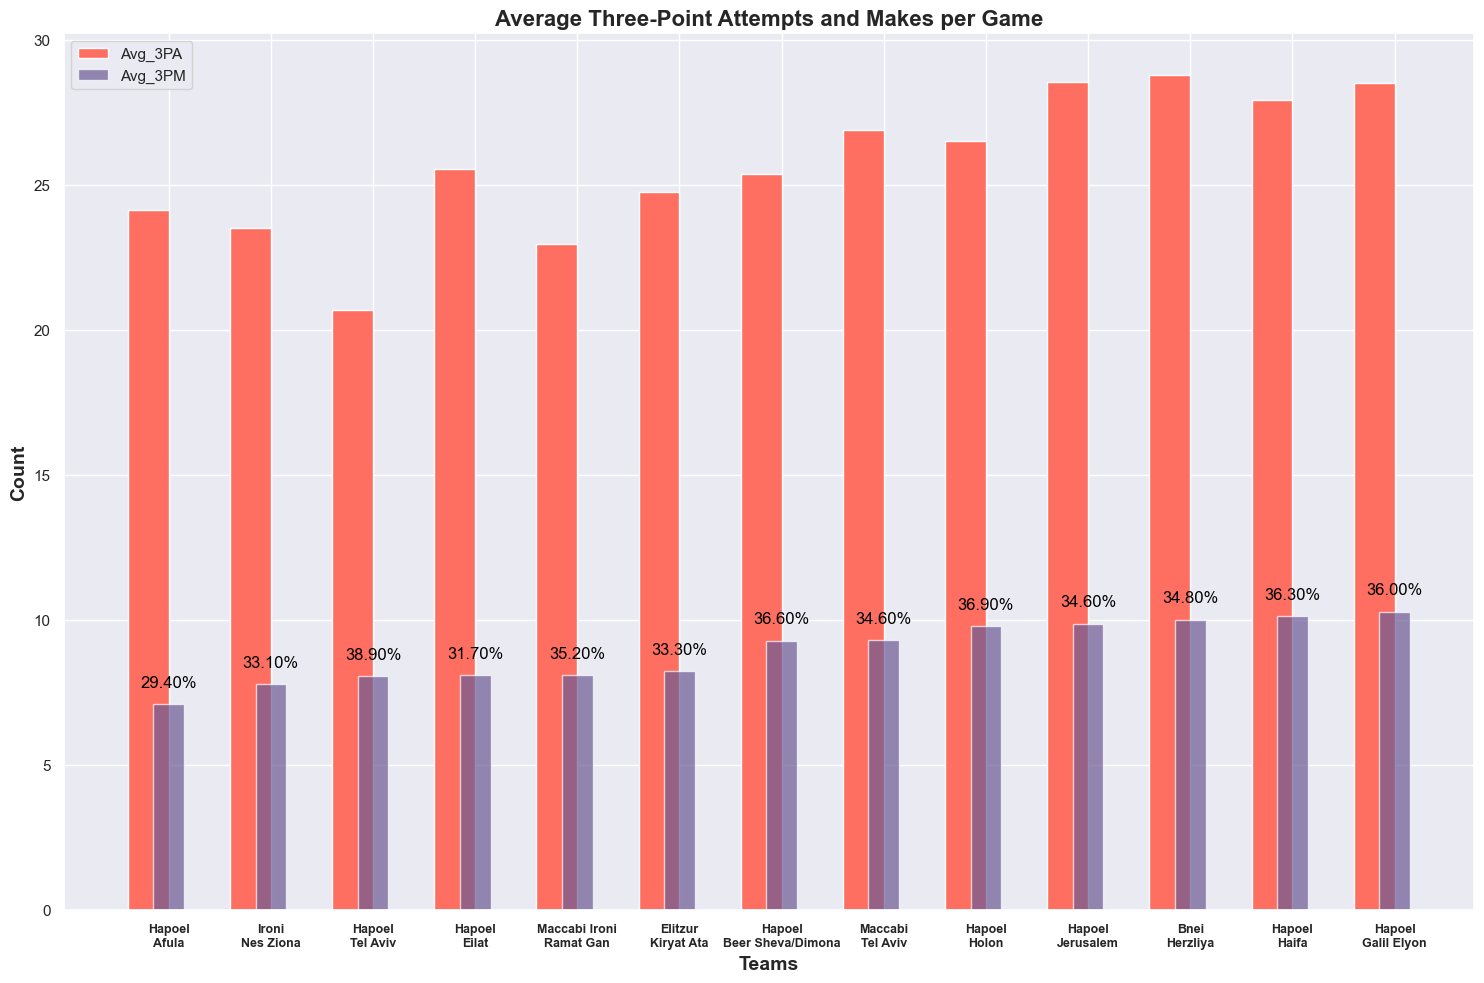

In [15]:
# Create and set up the figure size and DPI
plt.figure(figsize=(15, 10), dpi=100)

# Define the colors 
colors = ["#FF6F61", "#6B5B95"]

# Define the positions and width for the bars
bar_width = 0.4 
bar_width_pm = 0.3  
index = np.arange(len(ba2['FullTeamName']))

# Plot bars with overlap
plt.bar(index, ba2['Avg_3PA'], bar_width, label='Avg_3PA', color=colors[0])
plt.bar(index + bar_width/2, ba2['Avg_3PM'], bar_width_pm, label='Avg_3PM', color=colors[1], alpha=0.7)  

# Add percentages on top of the bars
for i in range(len(ba2)):
    plt.annotate(f"{ba2['3P%'][i]:.2f}%", 
                 (index[i] + bar_width/2, ba2['Avg_3PM'][i] + 0.5), 
                 ha='center', va='bottom', fontsize=12, color='black')

# Set the title and labels
plt.title('Average Three-Point Attempts and Makes per Game', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Split team names into two lines
split_team_names = ['\n'.join(name.split('-')) for name in ba2['FullTeamName']]
plt.xticks(index + bar_width/2, split_team_names, rotation=0, ha='center', fontsize=9, fontweight='bold')

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

plt.show()



Summary:

- There is a clear relationship between the number of three-point attempts and shooting percentages.
- For example, Hapoel Holon shows a high average of both attempts and makes with a high percentage (36.9%), while teams with lower attempts also tend to make fewer shots overall and have lower shooting percentages.
- Hapoel Tel Aviv is the exception, having made fewer attempts but achieving the highest shooting percentage (38.9%).

***What is the spread of average rebounds (offensive, defensive, total) for each team?***



In [16]:
# Show missing values per column
ba3.isnull().sum()

FullTeamName              0
Avg_Defensive_Rebounds    0
Avg_Offensive_Rebounds    0
Avg_Rebounds              0
dtype: int64

In [17]:
ba3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FullTeamName            13 non-null     object 
 1   Avg_Defensive_Rebounds  13 non-null     float64
 2   Avg_Offensive_Rebounds  13 non-null     float64
 3   Avg_Rebounds            13 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


In [18]:
ba3.describe()

,Avg_Defensive_Rebounds,Avg_Offensive_Rebounds,Avg_Rebounds
count,13.000000,13.000000,13.000000
mean,26.288462,11.423846,37.710000
std,1.722347,1.513404,2.655513
min,23.270000,9.300000,33.360000
25%,25.170000,10.090000,36.730000
50%,26.180000,11.740000,37.450000
75%,27.090000,12.050000,38.830000
max,29.170000,14.220000,42.350000


In [19]:
ba3.sort_values(by='Avg_Rebounds', ascending=False).reset_index(drop=True)

,FullTeamName,Avg_Defensive_Rebounds,Avg_Offensive_Rebounds,Avg_Rebounds
0,Hapoel-Afula,28.13,14.22,42.35
1,Maccabi-Tel Aviv,29.17,12.33,41.50
2,Ironi-Nes Ziona,28.78,11.78,40.57
3,Maccabi Ironi-Ramat Gan,27.09,11.74,38.83
4,Elitzur-Kiryat Ata,24.50,13.59,38.14
5,Hapoel-Jerusalem,26.18,11.95,38.14
6,Hapoel-Galil Elyon,26.00,11.55,37.45
7,Bnei-Herzliya,26.91,9.91,36.82
8,Hapoel-Tel Aviv,26.23,10.55,36.77
9,Hapoel-Beer Sheva/Dimona,24.68,12.05,36.73


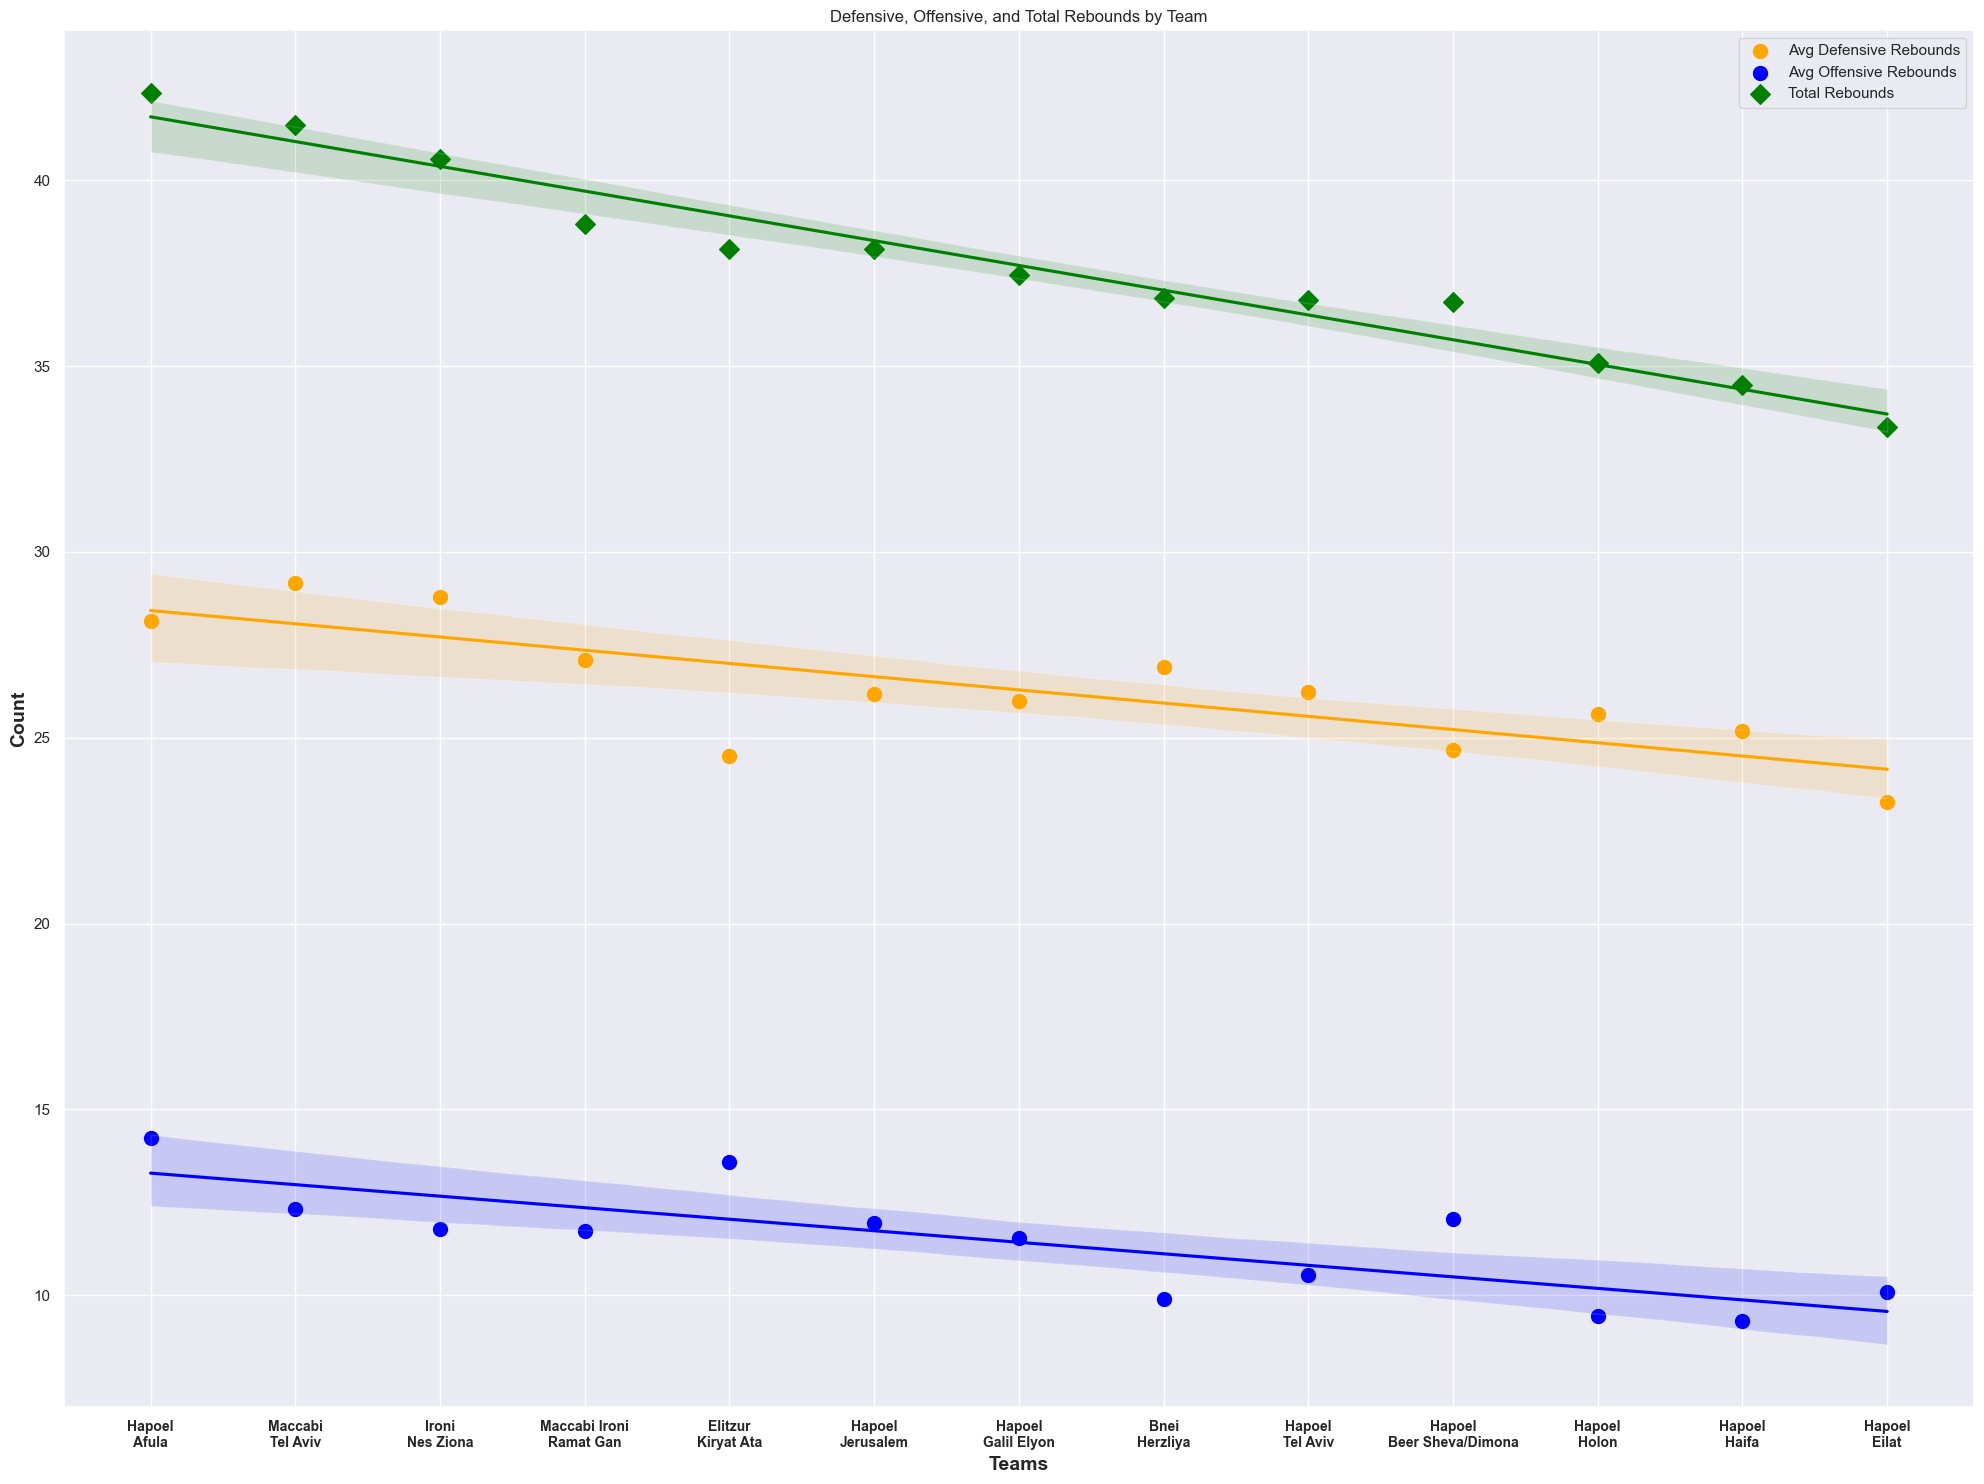

In [20]:
# Create and set up the figure size and DPI
plt.figure(figsize=(20,15), dpi=100)

# Sort the DataFrame 
ba3_sorted = ba3.sort_values(by='Avg_Rebounds', ascending=False).reset_index(drop=True)

# Define the positions for the bars
index = np.arange(len(ba3_sorted['FullTeamName']))

# Plot scatter plots
plt.scatter(index, ba3_sorted['Avg_Defensive_Rebounds'], color='orange', label='Avg Defensive Rebounds', s=100)
plt.scatter(index, ba3_sorted['Avg_Offensive_Rebounds'], color='blue', label='Avg Offensive Rebounds', s=100)
plt.scatter(index, ba3_sorted['Avg_Rebounds'], color='green', label='Total Rebounds', s=100, marker='D')

# Add trend lines
sb.regplot(x=index, y=ba3_sorted['Avg_Defensive_Rebounds'], scatter=False, color='orange')
sb.regplot(x=index, y=ba3_sorted['Avg_Offensive_Rebounds'], scatter=False, color='blue')
sb.regplot(x=index, y=ba3_sorted['Avg_Rebounds'], scatter=False, color='green')

# Set the title and labels
plt.title('Defensive, Offensive, and Total Rebounds by Team')
plt.xlabel('Teams', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Split team names into two lines
split_team_names = ['\n'.join(name.split('-')) for name in ba3_sorted['FullTeamName']]
plt.xticks(index, split_team_names, rotation=0, ha='center', fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


Summary:

- There is a clear relationship between average offensive rebounds and total rebounds, with teams that have high offensive   rebounds tending to also show high total rebounds. 
- For example, Maccabi-Tel Aviv and Ironi-Nes Ziona are among the teams with the highest total rebounds.


***"How do the top two teams with the highest Avg_PIR compare across key metrics?"***


In [21]:
# Note-The PIR (Performance Index Rating) is a composite metric that combines various statistical categories into a single score to assess a player's or team's overall performance and impact on the game.

In [22]:
# Show missing values per column
ba4.isnull().sum()

FullTeamName     0
Avg_Points       0
Avg_Asists       0
Avg_Rebounds     0
Avg_Blocks       0
Avg_Turnovers    0
Avg_Pir          0
dtype: int64

In [23]:
ba4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FullTeamName   13 non-null     object 
 1   Avg_Points     13 non-null     float64
 2   Avg_Asists     13 non-null     float64
 3   Avg_Rebounds   13 non-null     float64
 4   Avg_Blocks     13 non-null     float64
 5   Avg_Turnovers  13 non-null     float64
 6   Avg_Pir        13 non-null     float64
dtypes: float64(6), object(1)
memory usage: 860.0+ bytes


In [24]:
ba4.describe()

,Avg_Points,Avg_Asists,Avg_Rebounds,Avg_Blocks,Avg_Turnovers,Avg_Pir
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,83.333077,18.280769,37.710000,2.713077,12.726923,92.872308
std,4.677455,2.430259,2.655513,0.607267,0.796067,10.607242
min,75.910000,13.320000,33.360000,1.640000,11.180000,74.230000
25%,81.450000,17.410000,36.730000,2.450000,12.000000,87.830000
50%,82.270000,17.780000,37.450000,2.880000,13.000000,90.000000
75%,82.680000,18.860000,38.830000,3.000000,13.360000,93.820000
max,93.950000,22.950000,42.350000,3.680000,13.710000,114.270000


In [25]:
ba4

,FullTeamName,Avg_Points,Avg_Asists,Avg_Rebounds,Avg_Blocks,Avg_Turnovers,Avg_Pir
0,Bnei-Herzliya,81.45,17.41,36.82,3.68,13.00,96.36
1,Elitzur-Kiryat Ata,82.68,16.77,38.14,2.45,11.82,90.00
2,Hapoel-Afula,81.48,17.74,42.35,3.00,12.70,88.52
3,Hapoel-Beer Sheva/Dimona,82.14,18.05,36.73,3.00,13.36,86.59
4,Hapoel-Eilat,75.91,13.32,33.36,3.18,11.95,74.23
5,Hapoel-Galil Elyon,80.95,18.86,37.45,1.64,13.23,89.64
6,Hapoel-Haifa,82.57,17.78,34.48,2.78,13.39,87.83
7,Hapoel-Holon,82.27,21.18,35.09,2.95,13.00,93.82
8,Hapoel-Jerusalem,81.00,16.82,38.14,1.95,12.41,87.50
9,Hapoel-Tel Aviv,93.95,22.95,36.77,2.68,11.18,114.27


In [26]:
# Find the top 2 teams with the highest Avg_PIR
top_teams = ba4.nlargest(2, 'Avg_Pir')
top_teams

,FullTeamName,Avg_Points,Avg_Asists,Avg_Rebounds,Avg_Blocks,Avg_Turnovers,Avg_Pir
9,Hapoel-Tel Aviv,93.95,22.95,36.77,2.68,11.18,114.27
12,Maccabi-Tel Aviv,91.75,21.33,41.50,2.88,13.71,112.88


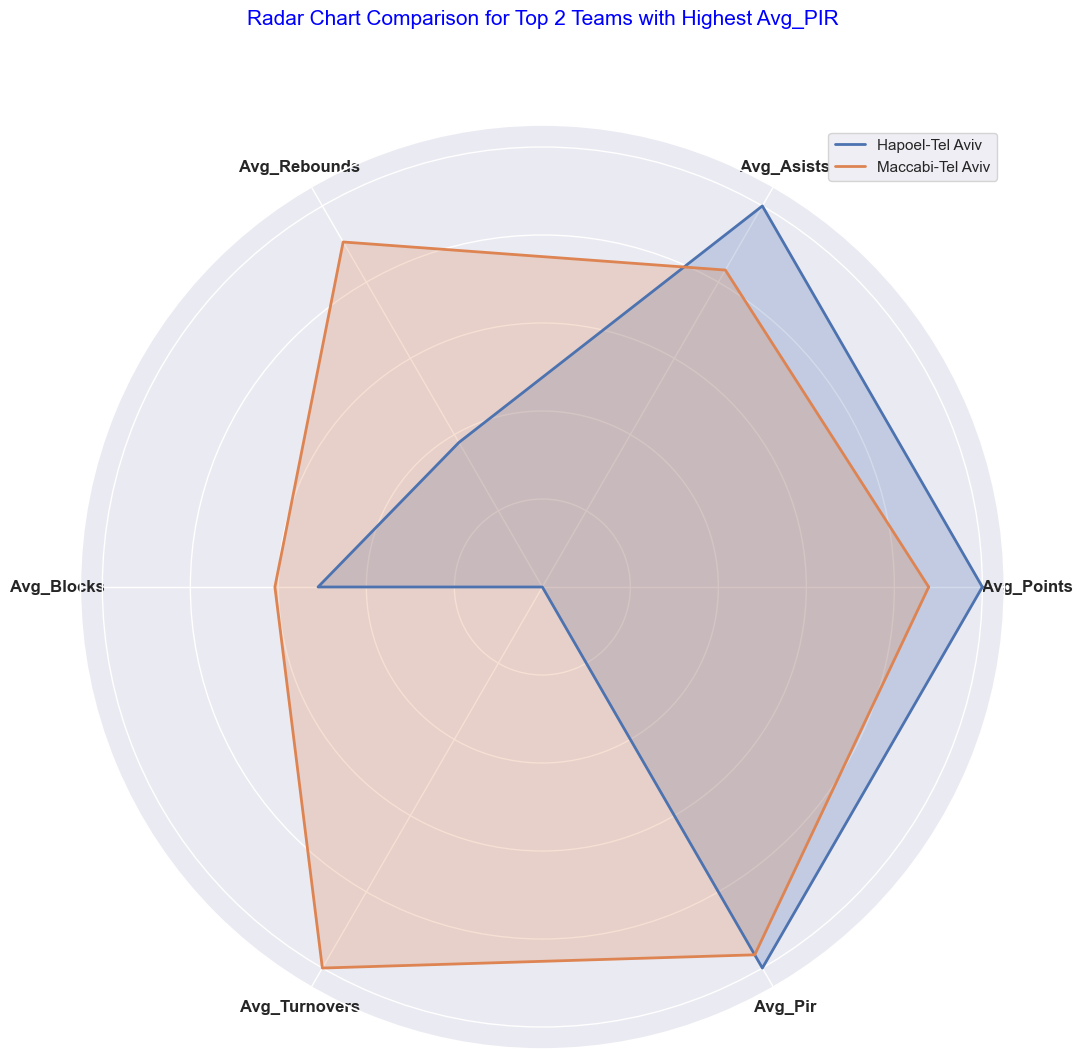

In [27]:
# Normalize data for better comparison
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

data_normalized = normalize(ba4[['Avg_Points', 'Avg_Asists', 'Avg_Rebounds', 'Avg_Blocks', 'Avg_Turnovers', 'Avg_Pir']])
data_normalized['FullTeamName'] = ba4['FullTeamName']

# Extract data for top 2 teams
top_teams_normalized = data_normalized[data_normalized['FullTeamName'].isin(top_teams['FullTeamName'])]

# Create radar chart
def create_radar_chart(df, teams):
    labels = ['Avg_Points', 'Avg_Asists', 'Avg_Rebounds', 'Avg_Blocks', 'Avg_Turnovers', 'Avg_Pir']
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, polar=True)
    
    for team in teams:
        team_data = df[df['FullTeamName'] == team][labels].values.flatten()
        team_data = np.concatenate((team_data, [team_data[0]]))  # To close the radar chart
        ax.plot(angles, team_data, linewidth=2, label=team)
        ax.fill(angles, team_data, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
    
    # Set the title
    plt.title('Radar Chart Comparison for Top 2 Teams with Highest Avg_PIR', size=15, color='blue', y=1.1)
    # set the legend
    plt.legend(loc='upper right')

    plt.show()

# Plot radar chart
create_radar_chart(top_teams_normalized, top_teams['FullTeamName'].values)


Summary:

- The top 2 teams with the highest Avg_PIR show a strong overall performance. 
- Hapoel Tel Aviv scores and assists a bit better, but Maccabi Tel Aviv is better at rebounding and blocking.
- Maccabi Tel Aviv has more turnovers, which might make the difference.
- The radar chart shows how they compare in these areas.

## Player Performance Analysis

***How does each player's scoring compare to the team average and to other players?***


In [28]:
# Show missing values per column
ba5.isnull().sum()

FullPlayerName    0
Avg_Points        0
dtype: int64

In [29]:
ba5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FullPlayerName  14 non-null     object 
 1   Avg_Points      14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 356.0+ bytes


In [30]:
ba5.describe()

,Avg_Points
count,14.000000
mean,9.517857
std,3.163385
min,3.810000
25%,7.937500
50%,9.030000
75%,11.682500
max,16.000000


In [31]:
# sort the values
ba5=ba5.sort_values(by='Avg_Points', ascending= False, ignore_index=True)

In [32]:
ba5

,FullPlayerName,Avg_Points
0,Roman-Sorkin,16.00
1,Jasiel-Rivero,12.20
2,Wade-Baldwin,12.13
3,Bonzie-Colson,11.77
4,Lorenzo-Brown,11.42
5,Josh-Nebo,10.94
6,John-Dibartolomeo,9.20
7,Tamir-Blatt,8.86
8,Rafi-Menco,8.67
9,Antonius-Cleveland,8.29


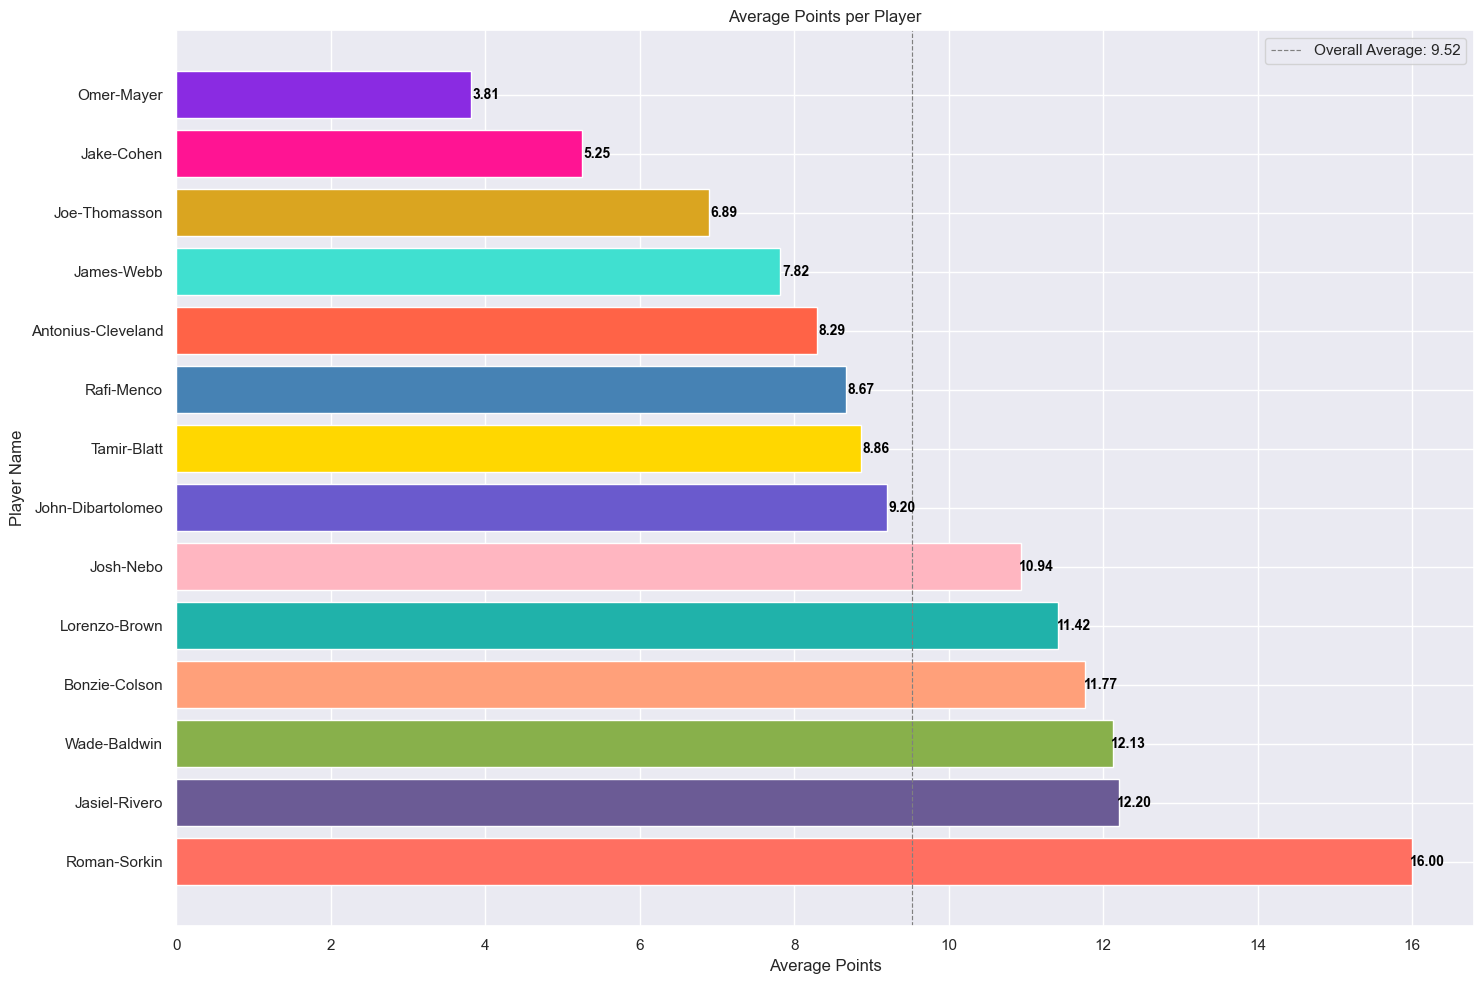

In [33]:
# Define the colors
colors = [ "#FF6F61", "#6B5B95", "#88B04B", "#FFA07A", "#20B2AA", "#FFB6C1", "#6A5ACD", "#FFD700", "#4682B4",
    "#FF6347", "#40E0D0", "#DAA520", "#FF1493", "#8A2BE2"]

# Calculate the overall average points
overall_avg_points = ba5['Avg_Points'].mean()

# Set up figure size, DPI and create horizontal bars
plt.figure(figsize=(15, 10), dpi=100)
bars = plt.barh(ba5['FullPlayerName'], ba5['Avg_Points'], color=colors[:len(ba5)])

# Add a line for the overall average points
plt.axvline(overall_avg_points, color='gray', linestyle='--', linewidth=0.85, label=f'Overall Average: {overall_avg_points:.2f}')

# Add average points at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width() + 0.2, 
        bar.get_y() + bar.get_height() / 2, 
        f"{bar.get_width():.2f}", 
        ha='center', 
        va='center', 
        fontsize=10, 
        color='black', 
        fontweight='bold'
    )

# Set the labels and title
plt.xlabel('Average Points')
plt.ylabel('Player Name')
plt.title('Average Points per Player')

# Add a legend
plt.legend()

# Adjust layout
plt.tight_layout()

plt.show()


Summary:
- The top 3 players (Roman Sorkin, Jasiel Rivero, and Wade Baldwin) score much higher on average, showing they are important for their teams' offense.
- The team’s average is 9.52 points per game, which we use to compare individual players.


***"How do individual players' shooting performances compare across different shooting categories?"***


In [34]:
# Show missing values per column
ba6.isnull().sum()

FullPlayerName    0
3P%               0
FG%               0
FT%               0
dtype: int64

In [35]:
ba6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FullPlayerName  14 non-null     object 
 1   3P%             14 non-null     float64
 2   FG%             14 non-null     float64
 3   FT%             14 non-null     float64
dtypes: float64(3), object(1)
memory usage: 580.0+ bytes


In [36]:
# Note- Josh Nebo did not attempt any three-pointers during the season. Consequently, his 3P% is recorded as 0.
# This can influence the overall average and may not accurately reflect his shooting abilities.
# Replace 0 values with NaN 
ba6.replace(0, np.nan, inplace=True)

In [37]:
ba6.describe()

,3P%,FG%,FT%
count,13.000000,14.000000,14.000000
mean,34.842308,60.220714,78.039286
std,8.599586,10.176696,12.178294
min,14.550000,42.860000,54.550000
25%,31.300000,52.227500,70.357500
50%,33.330000,62.500000,78.235000
75%,40.740000,67.767500,87.160000
max,48.890000,75.960000,100.000000


In [38]:
ba6.nlargest(3,'3P%')

,FullPlayerName,3P%,FG%,FT%
7,John-Dibartolomeo,48.89,59.26,80.0
13,Joe-Thomasson,45.83,42.86,100.0
2,Lorenzo-Brown,41.46,46.75,70.0


In [39]:
ba6.nsmallest(3,'3P%')

,FullPlayerName,3P%,FG%,FT%
3,Wade-Baldwin,14.55,52.58,87.18
9,Jake-Cohen,30.00,68.75,89.19
4,Rafi-Menco,31.11,67.19,54.55


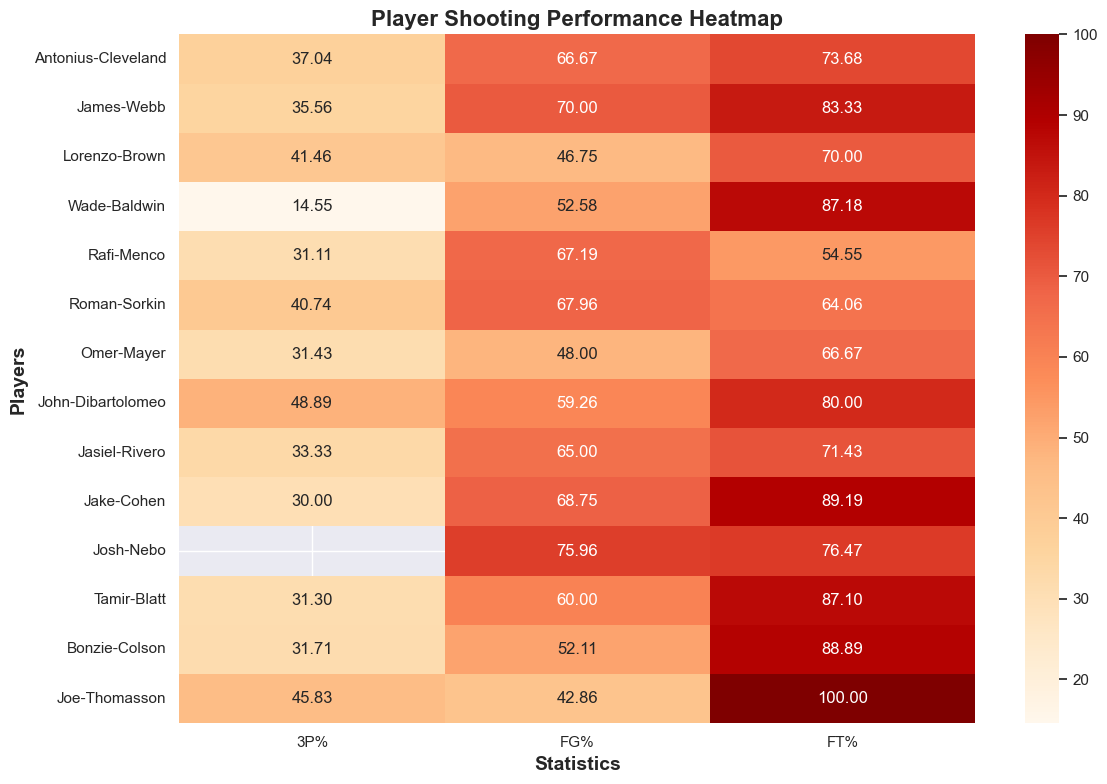

In [40]:
# Set the figure size and dpi
plt.figure(figsize=(12, 8),dpi=100)

# Create a heatmap with an orange-red color palette
sb.heatmap(ba6.set_index('FullPlayerName'), cmap='OrRd', annot=True, fmt=".2f")

# Set the title and labels
plt.title('Player Shooting Performance Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Statistics', fontsize=14, fontweight='bold')
plt.ylabel('Players', fontsize=14, fontweight='bold')

# Adjust layout 
plt.tight_layout()

plt.show()


Summary:

- Players with higher FG% and 3P% often tend to also have a higher FT%. 
- This is observed with players like Joe-Thomasson (100% FT%, 42.86% FG%) and Lorenzo-Brown (70% FT%, 46.75% FG%) showing good performance in multiple shooting categories.

***What is the distribution of PER 36 Statistic in points, assists and rebounds across all players?***

In [41]:
# Note- The PER 36 metric estimates a player's performance by extrapolating their stats to a hypothetical 36 minutes of play, providing a standardized measure for comparing players with different playing times.

In [42]:
# Show missing values per column
ba7.isnull().sum()

FullPlayerName     0
Per_36_Points      0
Per_36_Assists     0
Per_36_Rebounds    0
dtype: int64

In [43]:
ba7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FullPlayerName   14 non-null     object 
 1   Per_36_Points    14 non-null     float64
 2   Per_36_Assists   14 non-null     float64
 3   Per_36_Rebounds  14 non-null     float64
dtypes: float64(3), object(1)
memory usage: 580.0+ bytes


In [44]:
ba7.describe()

,Per_36_Points,Per_36_Assists,Per_36_Rebounds
count,14.000000,14.000000,14.000000
mean,16.334286,3.867857,6.856429
std,4.034363,3.107371,2.851514
min,10.900000,0.660000,3.200000
25%,13.812500,1.615000,4.462500
50%,15.450000,2.485000,6.475000
75%,18.787500,5.340000,9.112500
max,24.410000,10.310000,12.000000


In [45]:
ba7

,FullPlayerName,Per_36_Points,Per_36_Assists,Per_36_Rebounds
0,Antonius-Cleveland,15.64,2.56,6.88
1,James-Webb,13.70,1.12,9.72
2,Lorenzo-Brown,18.27,7.87,4.80
3,Wade-Baldwin,19.51,8.25,3.32
4,Rafi-Menco,14.15,1.63,8.24
5,Roman-Sorkin,24.41,1.91,9.38
6,Omer-Mayer,11.56,4.74,4.17
7,John-Dibartolomeo,15.26,2.41,5.06
8,Jasiel-Rivero,22.64,1.61,12.00
9,Jake-Cohen,10.90,4.67,8.31


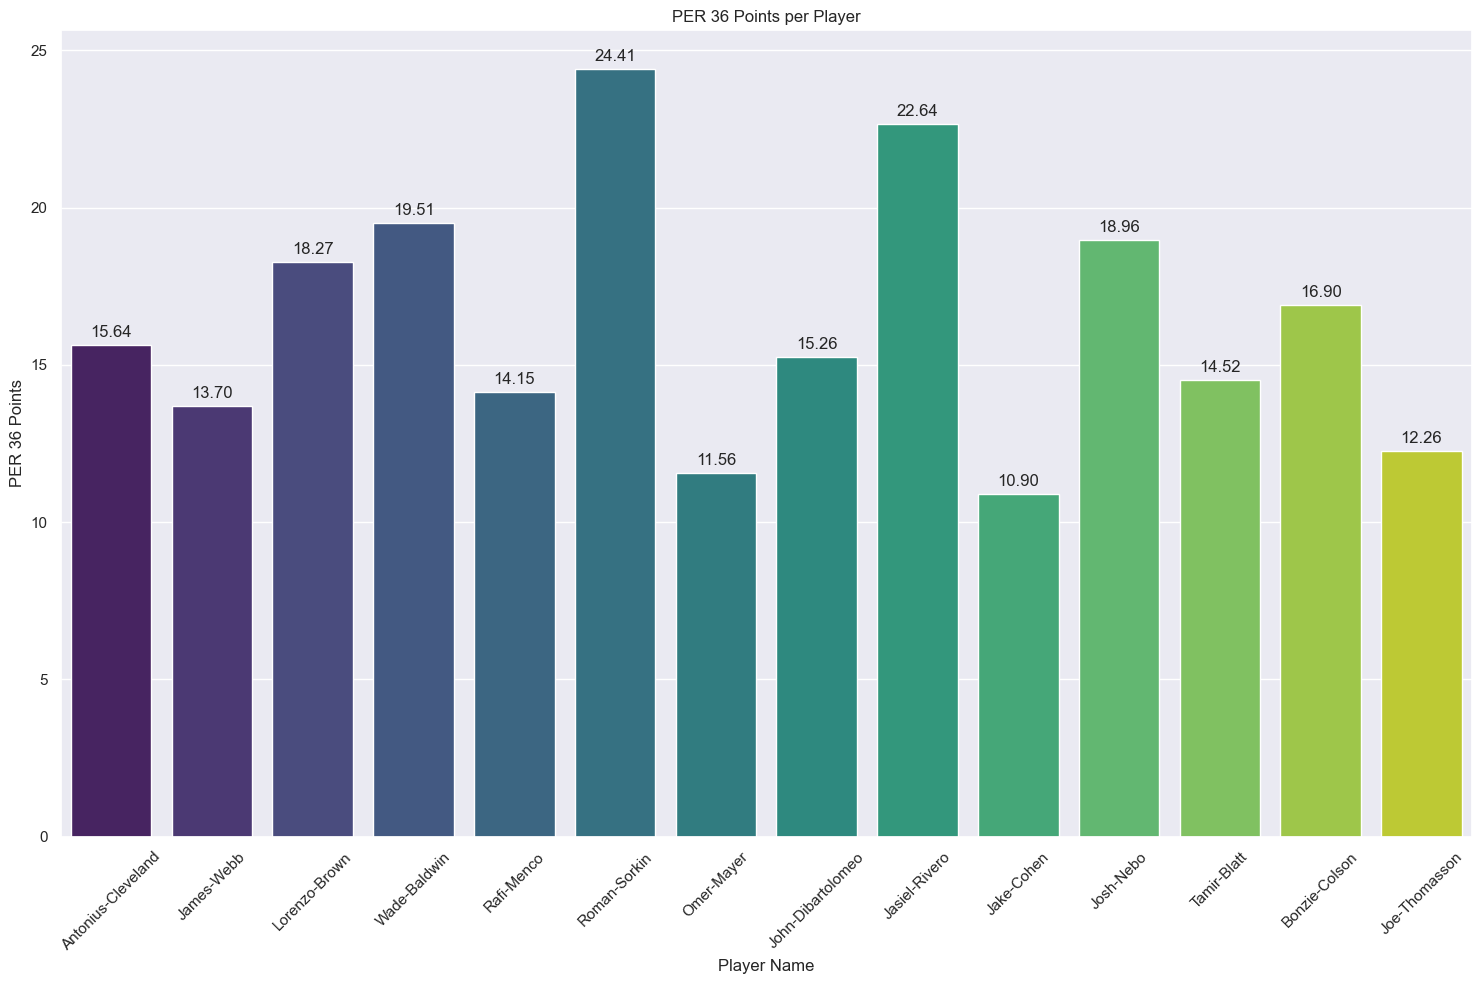

In [46]:
# Bar Plot for PER 36 Points
plt.figure(figsize=(15, 10), dpi= 100)
sb.barplot(x='FullPlayerName', y='Per_36_Points', hue='FullPlayerName', data=ba7, palette='viridis', dodge=False)

# Customize plot
plt.title('PER 36 Points per Player')
plt.xlabel('Player Name')
plt.ylabel('PER 36 Points')
plt.xticks(rotation=45)

# Annotate each bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

# Remove legend
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

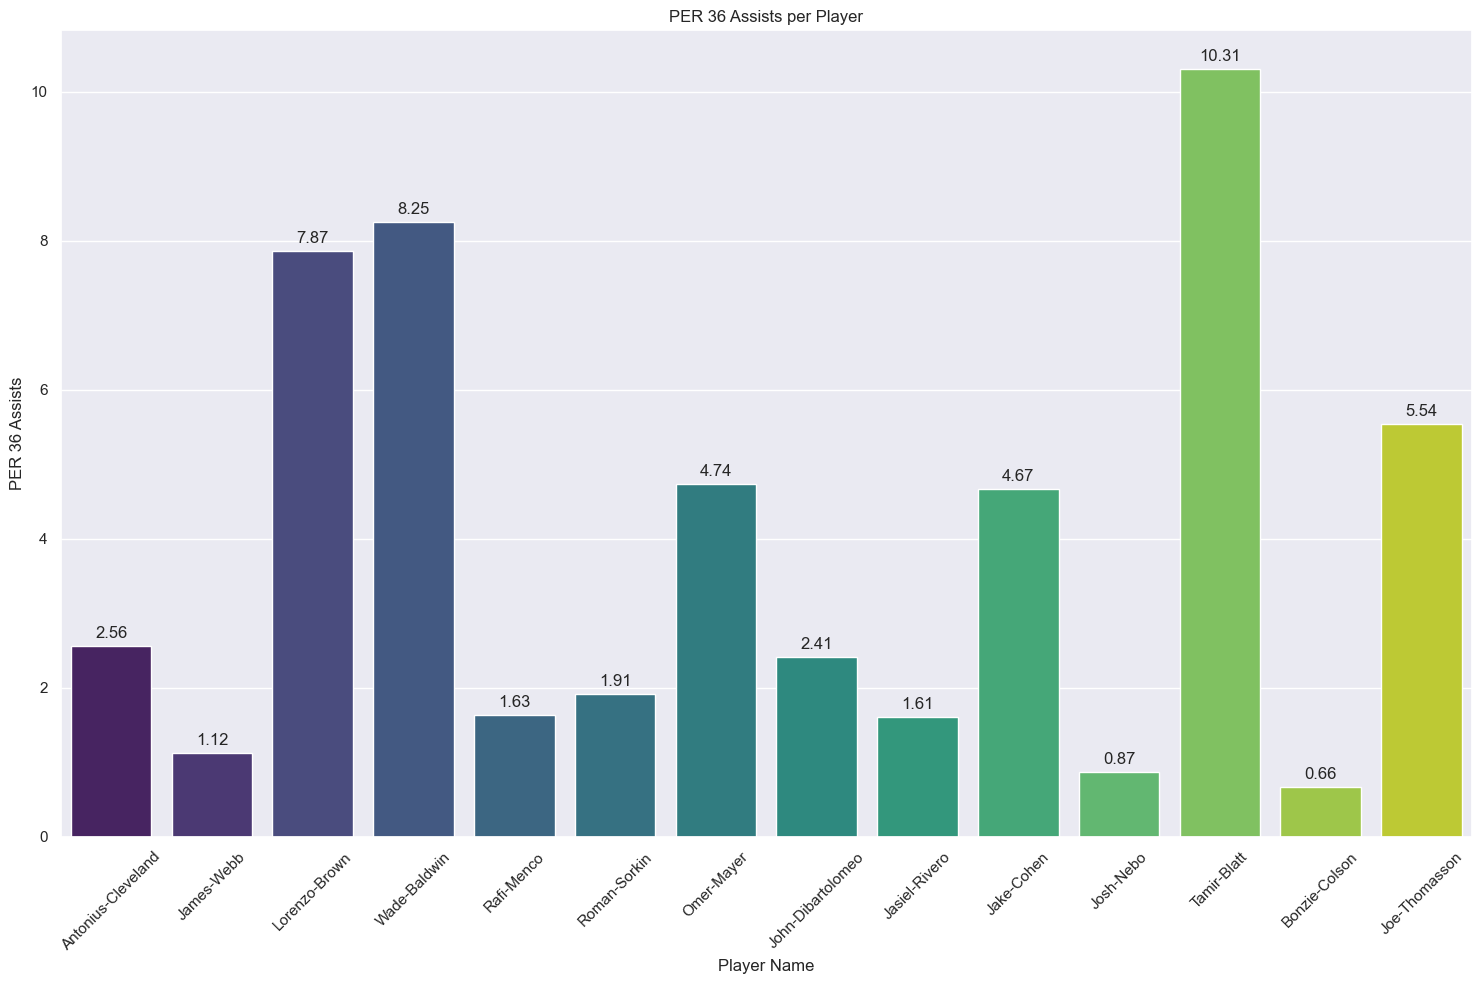

In [47]:
# Create Bar Plot 
plt.figure(figsize=(15, 10), dpi= 100)
sb.barplot(x='FullPlayerName', y='Per_36_Assists', hue='FullPlayerName', data=ba7, palette='viridis', dodge=False)

# Customize plot
plt.title('PER 36 Assists per Player')
plt.xlabel('Player Name')
plt.ylabel('PER 36 Assists')
plt.xticks(rotation=45)

# Annotate each bar 
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

# Remove legend
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

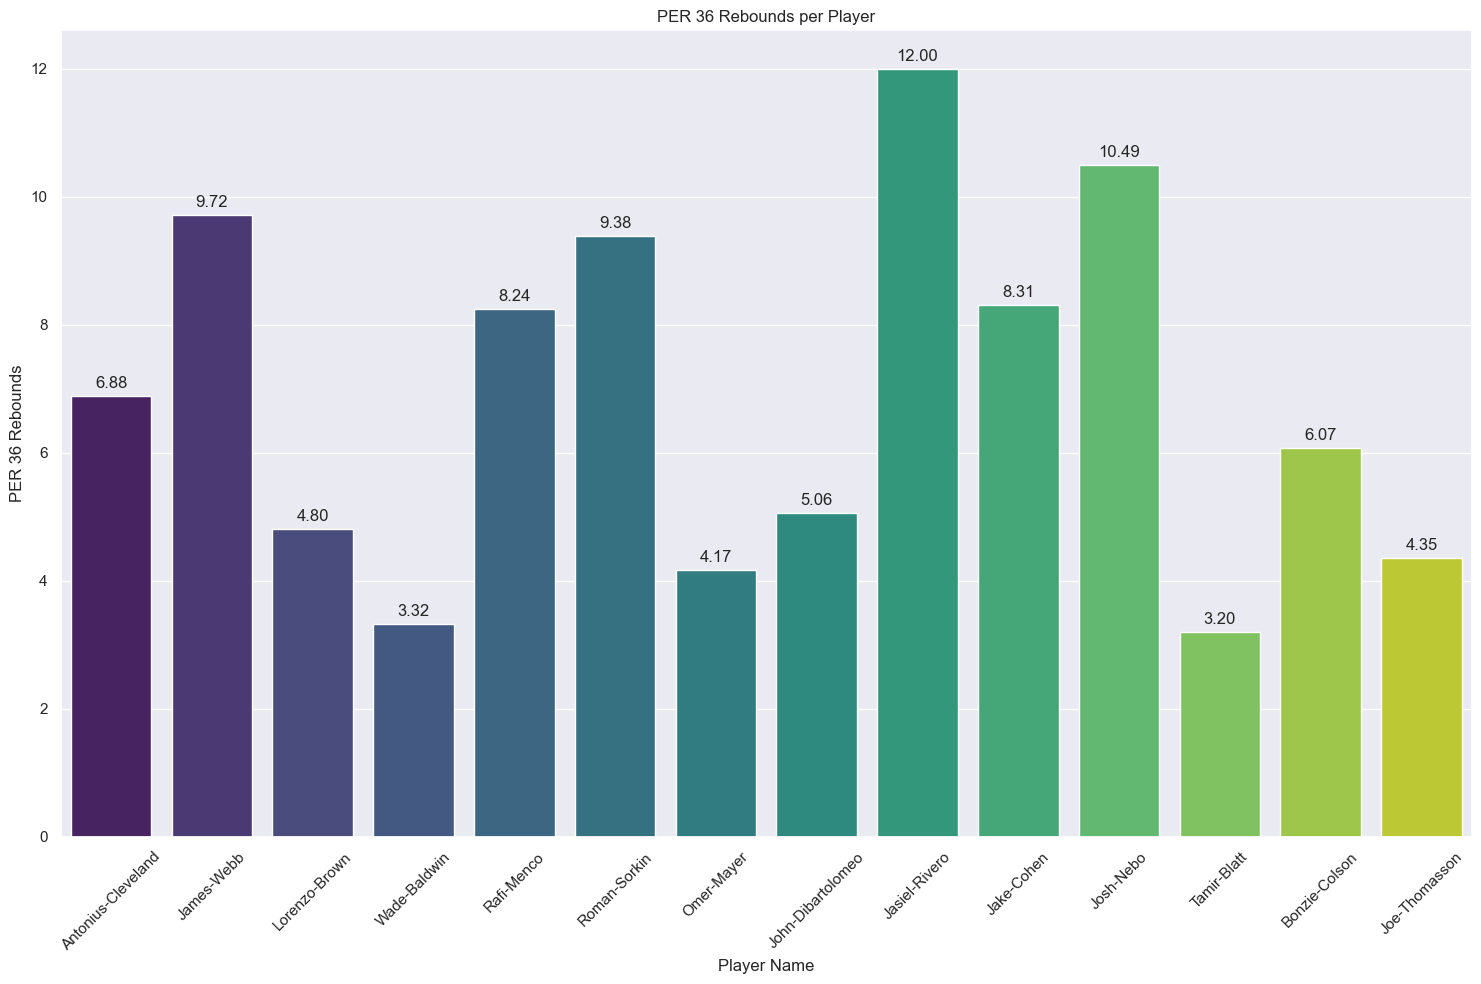

In [48]:
# Create a bar plot
plt.figure(figsize=(15, 10),dpi= 100)
sb.barplot(x='FullPlayerName', y='Per_36_Rebounds', hue='FullPlayerName', data=ba7, palette='viridis', dodge=False)

# Customize plot
plt.title('PER 36 Rebounds per Player')
plt.xlabel('Player Name')
plt.ylabel('PER 36 Rebounds')
plt.xticks(rotation=45)

# Annotate each bar with the height value
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')

# Remove legend
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Summary:

- Scoring- Roman Sorkin and Jasiel Rivero are top scorers and greatly boost their team's offense.
- Playmaking- Tamir Blatt stands out in creating plays, leading in PER 36 assists.
- Rebounding- Jasiel Rivero is a key player in rebounding, helping with possession and defense.

Based on the data, Jasiel Rivero could become one of the team’s most effective and impactful players with more playing time.

***"What is the Correlation Between Minutes Played and Points Scored for Each Player?"***


In [49]:
# Show missing values per column
ba8.isnull().sum()

FullPlayerName    0
Avg_Minutes       0
Avg_Points        0
dtype: int64

In [50]:
ba8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FullPlayerName  14 non-null     object 
 1   Avg_Minutes     14 non-null     float64
 2   Avg_Points      14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 468.0+ bytes


In [51]:
ba8.describe()

,Avg_Minutes,Avg_Points
count,14.000000,14.000000
mean,20.606429,9.517857
std,3.182581,3.163385
min,11.880000,3.810000
25%,19.605000,7.937500
50%,21.240000,9.030000
75%,22.297500,11.682500
max,25.080000,16.000000


In [52]:
ba8

,FullPlayerName,Avg_Minutes,Avg_Points
0,Antonius-Cleveland,19.07,8.29
1,James-Webb,20.55,7.82
2,Lorenzo-Brown,22.50,11.42
3,Wade-Baldwin,22.38,12.13
4,Rafi-Menco,22.05,8.67
5,Roman-Sorkin,23.60,16.00
6,Omer-Mayer,11.88,3.81
7,John-Dibartolomeo,21.70,9.20
8,Jasiel-Rivero,19.40,12.20
9,Jake-Cohen,17.33,5.25


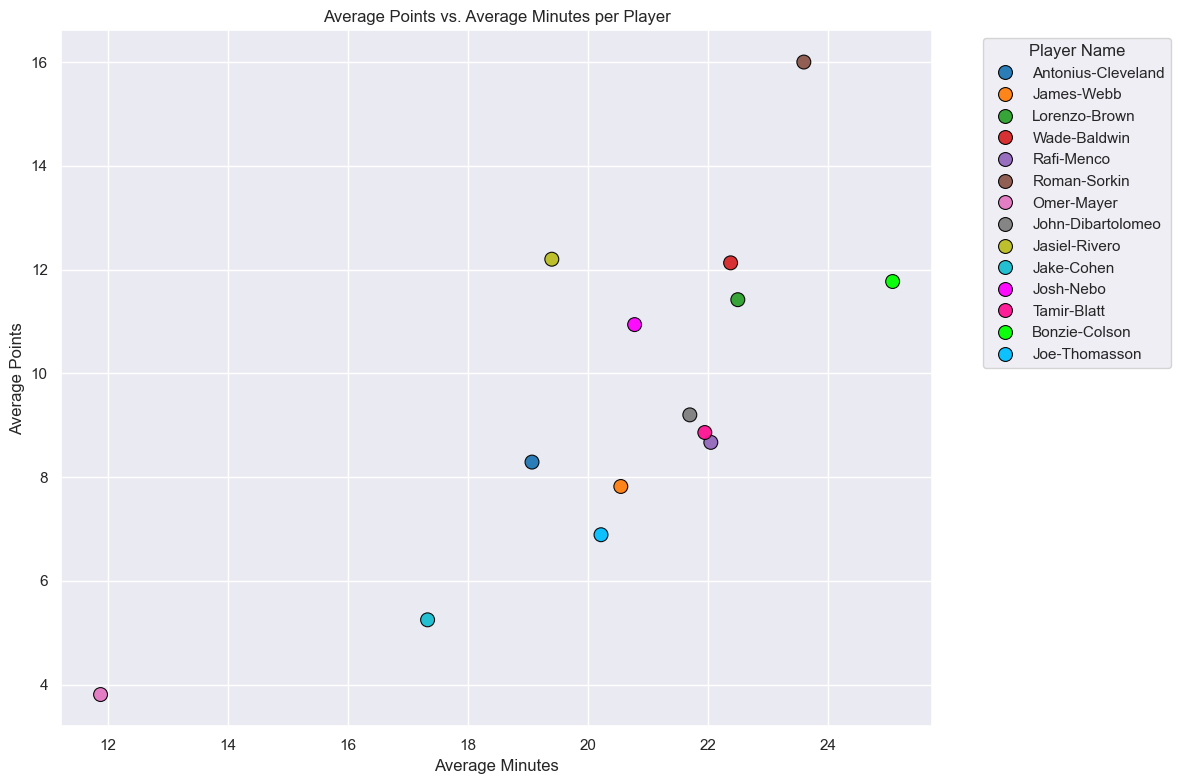

In [53]:
# Define the colors for the bars
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22",
          "#17becf", "#ff00ff", "#ff1493", "#00ff00", "#00bfff"]

# Create scatter plot 
plt.figure(figsize=(12, 8), dpi=100)
sb.scatterplot(x='Avg_Minutes', y='Avg_Points', data=ba8, hue='FullPlayerName', 
                              palette=colors, s=100, edgecolor='black', linewidth=0.8, alpha=0.95)

# Customize plot
plt.title('Average Points vs. Average Minutes per Player')
plt.xlabel('Average Minutes')
plt.ylabel('Average Points')
plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Summary:

- Potential for Increased Impact- Jasiel-Rivero shows a high scoring efficiency with an average of 12.20 points in just 19.40 minutes, indicating that he could have a significant impact if given more playing time.
- Top Performers- Roman-Sorkin stands out as the top scorer, while Wade-Baldwin and Lorenzo-Brown also contribute significantly with their scoring.
- Efficiency and Consistency- Players like Josh-Nebo and John-Dibartolomeo demonstrate good efficiency in their playtime, making them reliable contributors to the team.

***"How does the assist to turnover ratio vary among players?"***



In [54]:
# Show missing values per column
ba9.isnull().sum()

FullPlayerName      0
Ast_To_Tov_Ratio    0
dtype: int64

In [55]:
ba9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FullPlayerName    14 non-null     object 
 1   Ast_To_Tov_Ratio  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 356.0+ bytes


In [56]:
ba9.describe()

,Ast_To_Tov_Ratio
count,14.000000
mean,1.530000
std,0.747992
min,0.410000
25%,0.880000
50%,1.610000
75%,2.140000
max,2.590000


In [57]:
# sort the values 
ba9 =ba9.sort_values(by='Ast_To_Tov_Ratio', ascending= False, ignore_index=True)

In [58]:
ba9.head(3)

,FullPlayerName,Ast_To_Tov_Ratio
0,Tamir-Blatt,2.59
1,Jake-Cohen,2.45
2,John-Dibartolomeo,2.42


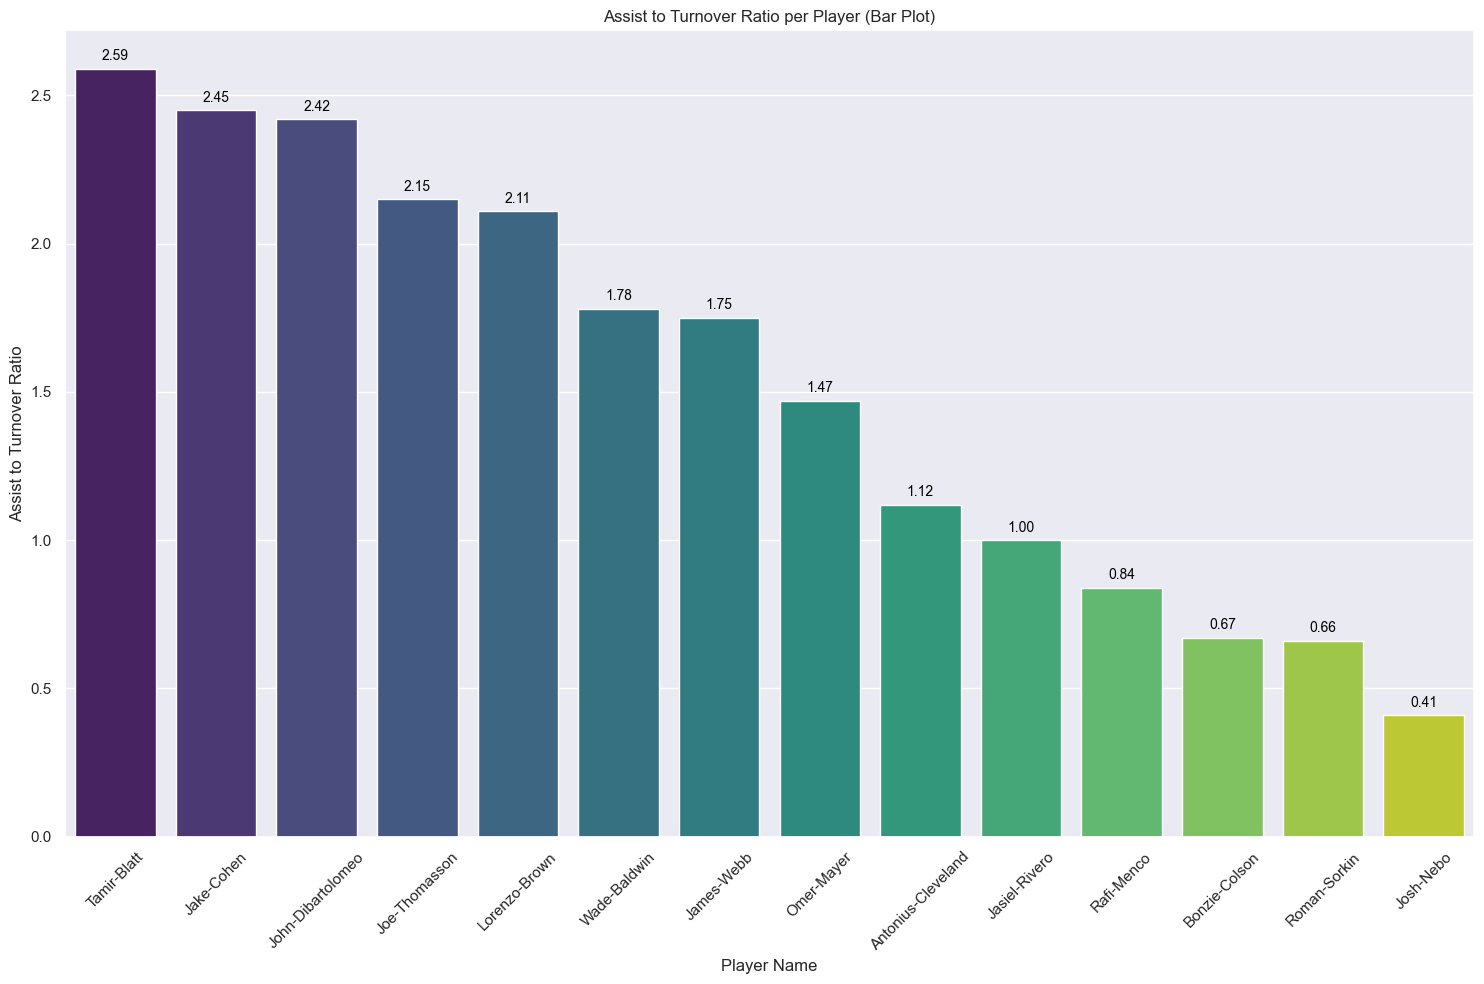

In [59]:
# Create Bar Plot
plt.figure(figsize=(15, 10), dpi=100)
bar_plot = sb.barplot(x='FullPlayerName', y='Ast_To_Tov_Ratio', hue='FullPlayerName', data=ba9, palette='viridis', dodge=False)

# Add text annotations to the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9), textcoords='offset points',
                      fontsize=10, color='black')

# Customize plot
plt.title('Assist to Turnover Ratio per Player (Bar Plot)')
plt.xlabel('Player Name')
plt.ylabel('Assist to Turnover Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary:

- Tamir Blatt, Jake Cohen, and John Dibartolomeo lead in assist-to-turnover ratio, highlighting their efficiency in ball handling and playmaking. 
- Josh Nebo and Roman Sorkin have the lowest ratios, indicating areas for improvement in their decision-making.

***How does the player's tenure in the team affect their performance? (Points, Rebounds, Assists)***

In [60]:
# Show missing values per column
ba10.isnull().sum()

FullPlayerName    0
YearsOnTeam       0
Avg_Points        0
Avg_Rebounds      0
Avg_Assists       0
dtype: int64

In [61]:
ba10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FullPlayerName  14 non-null     object 
 1   YearsOnTeam     14 non-null     int64  
 2   Avg_Points      14 non-null     float64
 3   Avg_Rebounds    14 non-null     float64
 4   Avg_Assists     14 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 692.0+ bytes


In [62]:
ba10.describe()

,YearsOnTeam,Avg_Points,Avg_Rebounds,Avg_Assists
count,14.000000,14.000000,14.000000,14.000000
mean,2.428571,9.517857,3.930714,2.199286
std,2.243428,3.163385,1.704155,1.915168
min,1.000000,3.810000,1.380000,0.460000
25%,1.000000,7.937500,2.580000,0.902500
50%,2.000000,9.030000,3.820000,1.405000
75%,2.000000,11.682500,5.425000,2.895000
max,8.000000,16.000000,6.470000,6.290000


In [63]:
# sort the values
ba10. sort_values(by='YearsOnTeam', ascending= True, ignore_index=True)

,FullPlayerName,YearsOnTeam,Avg_Points,Avg_Rebounds,Avg_Assists
0,Antonius-Cleveland,1,8.29,3.64,1.36
1,James-Webb,1,7.82,5.55,0.64
2,Omer-Mayer,1,3.81,1.38,1.56
3,Jasiel-Rivero,1,12.20,6.47,0.87
4,Tamir-Blatt,1,8.86,1.95,6.29
5,Joe-Thomasson,1,6.89,2.44,3.11
6,Lorenzo-Brown,2,11.42,3.00,4.92
7,Wade-Baldwin,2,12.13,2.06,5.13
8,Rafi-Menco,2,8.67,5.05,1.00
9,Josh-Nebo,2,10.94,6.06,0.50


C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\2059039536.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Tenure_Group', y='Avg_Points', data=ba10, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\2059039536.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Tenure_Group', y='Avg_Points', data=ba10, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\2059039536.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Tenure_Group', y='Avg_Assists', data=ba10, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\2059039536.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is depre

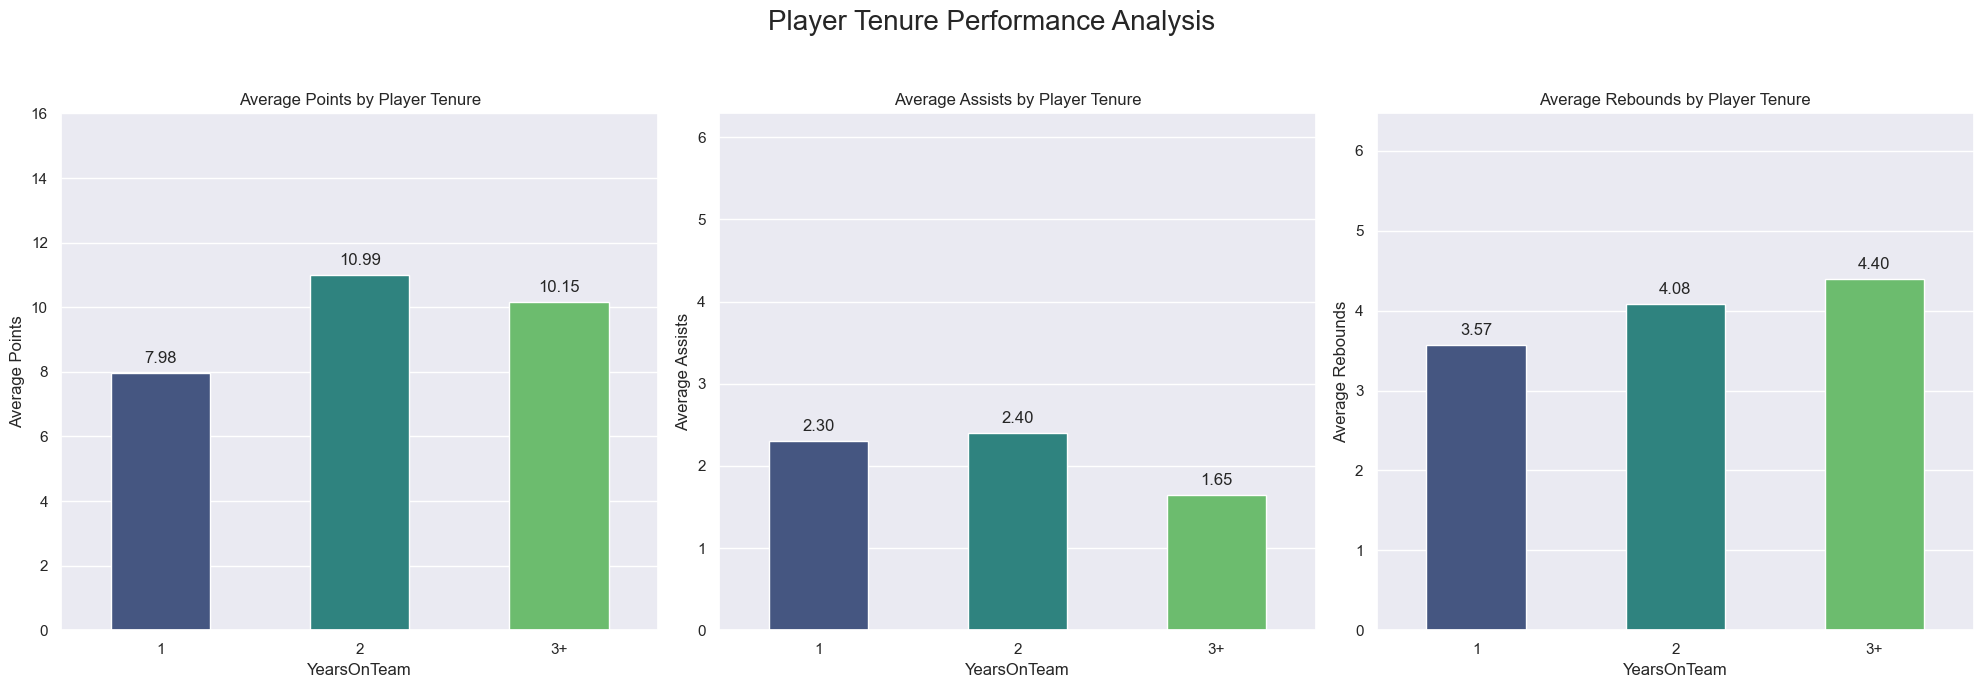

In [64]:
# Define the function to categorize tenure
def categorize_tenure(years):
    if years == 1:
        return '1'
    elif years == 2:
        return '2'
    else:
        return '3+'

# Apply the function to create a new column for Tenure_Group
ba10['Tenure_Group'] = ba10['YearsOnTeam'].apply(categorize_tenure)

# Create the figure and dpi
plt.figure(figsize=(20, 7), dpi=100) 

plt.suptitle('Player Tenure Performance Analysis', fontsize=20)

# Plot for Points
plt.subplot(1, 3, 1)  
sb.barplot(x='Tenure_Group', y='Avg_Points', data=ba10, palette='viridis', ci=None, width=0.5) 
plt.title('Average Points by Player Tenure')
plt.xlabel('YearsOnTeam') 
plt.ylabel('Average Points')
plt.ylim(0, ba10['Avg_Points'].max()) 

# Annotate each bar 
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',  
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12)

# Plot for Assists
plt.subplot(1, 3, 2) 
sb.barplot(x='Tenure_Group', y='Avg_Assists', data=ba10, palette='viridis', ci=None, width=0.5)  
plt.title('Average Assists by Player Tenure')
plt.xlabel('YearsOnTeam')
plt.ylabel('Average Assists')
plt.ylim(0, ba10['Avg_Assists'].max()) 

# Annotate each bar 
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12)

# Plot for Rebounds
plt.subplot(1, 3, 3)  
sb.barplot(x='Tenure_Group', y='Avg_Rebounds', data=ba10, palette='viridis', ci=None, width=0.5)  
plt.title('Average Rebounds by Player Tenure')
plt.xlabel('YearsOnTeam') 
plt.ylabel('Average Rebounds')
plt.ylim(0, ba10['Avg_Rebounds'].max()) 

# Annotate each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',  
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12) 
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Summary:

- Players with more years on the team tend to score better, demonstrating how experience boosts performance. 
- Conversely, newer players often excel in assists, indicating quick adaptation in playmaking roles.

***What is the difference in performance between player positions? (Points, Assists, Rebounds)***

In [65]:
# Show missing values per column
ba11.isnull().sum()

FullPlayerName    0
Position          0
Avg_Points        0
Avg_Rebounds      0
Avg_Assists       0
dtype: int64

In [66]:
ba11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FullPlayerName  14 non-null     object 
 1   Position        14 non-null     object 
 2   Avg_Points      14 non-null     float64
 3   Avg_Rebounds    14 non-null     float64
 4   Avg_Assists     14 non-null     float64
dtypes: float64(3), object(2)
memory usage: 692.0+ bytes


In [67]:
ba11.describe()

,Avg_Points,Avg_Rebounds,Avg_Assists
count,14.000000,14.000000,14.000000
mean,9.517857,3.930714,2.199286
std,3.163385,1.704155,1.915168
min,3.810000,1.380000,0.460000
25%,7.937500,2.580000,0.902500
50%,9.030000,3.820000,1.405000
75%,11.682500,5.425000,2.895000
max,16.000000,6.470000,6.290000


In [68]:
ba11

,FullPlayerName,Position,Avg_Points,Avg_Rebounds,Avg_Assists
0,Antonius-Cleveland,SF,8.29,3.64,1.36
1,James-Webb,PF,7.82,5.55,0.64
2,Lorenzo-Brown,PG,11.42,3.00,4.92
3,Wade-Baldwin,SG,12.13,2.06,5.13
4,Rafi-Menco,SF,8.67,5.05,1.00
5,Roman-Sorkin,C,16.00,6.15,1.25
6,Omer-Mayer,PG,3.81,1.38,1.56
7,John-Dibartolomeo,SG,9.20,3.05,1.45
8,Jasiel-Rivero,C,12.20,6.47,0.87
9,Jake-Cohen,PF,5.25,4.00,2.25


C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\3460873132.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Position', y='Avg_Points', data=ba11, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\3460873132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Position', y='Avg_Points', data=ba11, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\3460873132.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x='Position', y='Avg_Assists', data=ba11, palette='viridis', ci=None, width=0.5)
C:\Users\noamt\AppData\Local\Temp\ipykernel_25484\3460873132.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

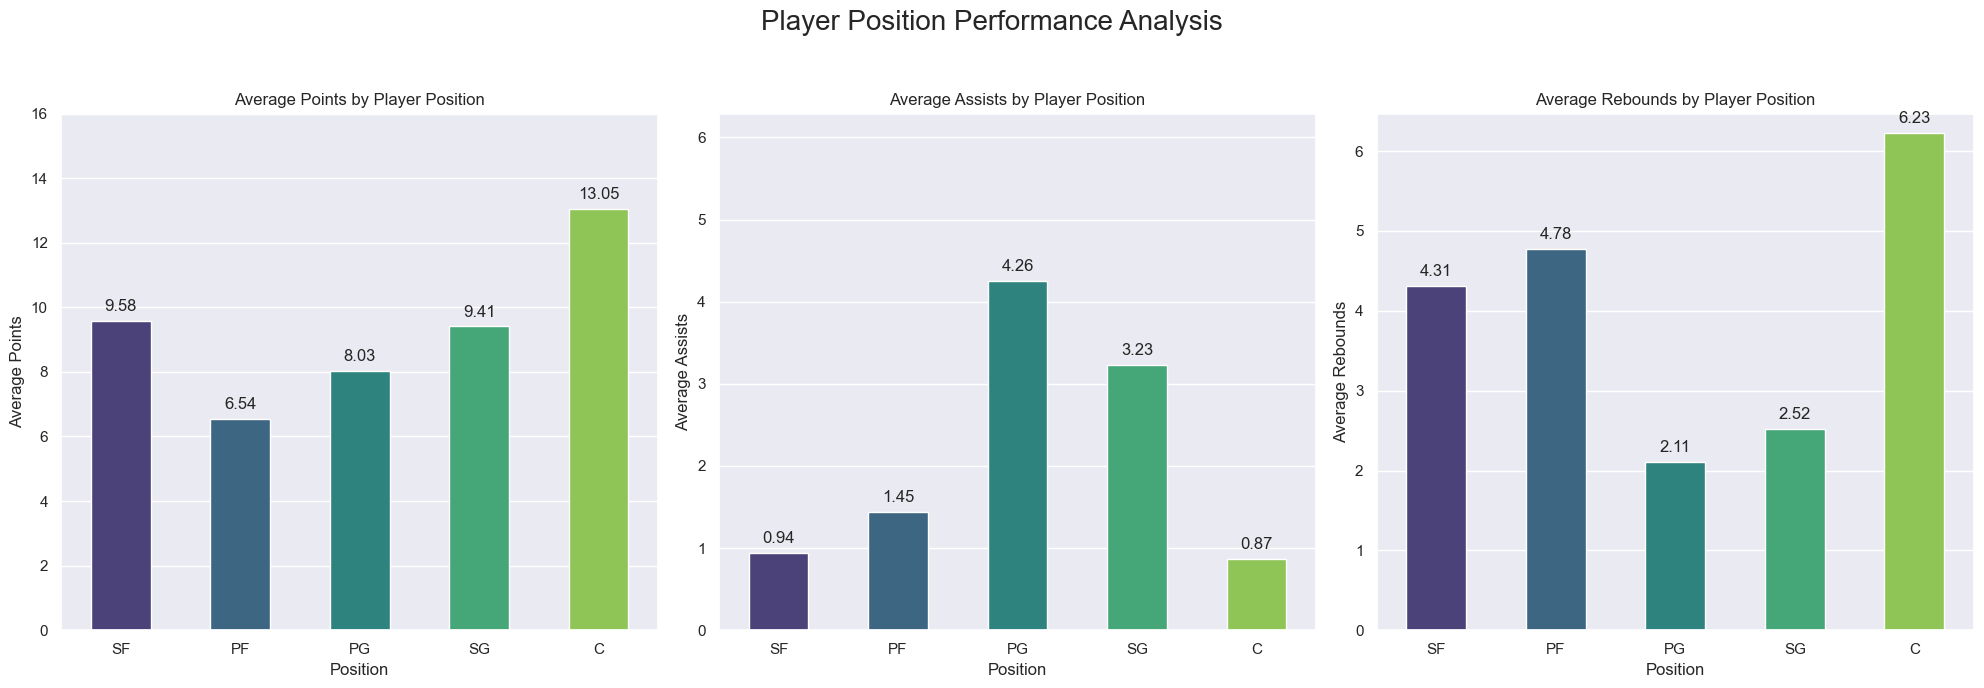

In [69]:
# Create the figure and dpi
plt.figure(figsize=(20, 7), dpi=100)  

plt.suptitle('Player Position Performance Analysis', fontsize=20)

# Plot for Points
plt.subplot(1, 3, 1) 
sb.barplot(x='Position', y='Avg_Points', data=ba11, palette='viridis', ci=None, width=0.5)  
plt.title('Average Points by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Points')
plt.ylim(0, ba11['Avg_Points'].max()) 

# Annotate each bar 
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12)  

# Plot for Assists
plt.subplot(1, 3, 2) 
sb.barplot(x='Position', y='Avg_Assists', data=ba11, palette='viridis', ci=None, width=0.5) 
plt.title('Average Assists by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Assists')
plt.ylim(0, ba11['Avg_Assists'].max())  

# Annotate each bar 
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',  
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12) 

# Plot for Rebounds
plt.subplot(1, 3, 3) 
sb.barplot(x='Position', y='Avg_Rebounds', data=ba11, palette='viridis', ci=None, width=0.5)  
plt.title('Average Rebounds by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Rebounds')
plt.ylim(0, ba11['Avg_Rebounds'].max()) 

# Annotate each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',  
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 fontsize=12) 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Summary:

- Centers excel in scoring and rebounding. 
- Point Guards lead in assists.
- Small Forwards and Power Forwards show balanced performance across points and rebounds.